# DBSCAN (density- based spatial clustering of applications with noise)

In [448]:
## Libraries to process the data
import pandas as pd 
import numpy as np

## Libraries to Plot the Clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [449]:
df = pd.read_csv('players_22.csv')
df.head(10)

/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_35437/1842036286.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
5,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,...,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/si.png
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,...,34+3,34+3,34+3,35+3,88+2,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,...,61+3,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png


In [450]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [451]:
columns = ['potential', 'overall']
data = df[columns].copy()
data.head(10)

,potential,overall
0,93,93
1,92,92
2,91,91
3,91,91
4,91,91
5,93,91
6,95,91
7,90,90
8,92,90
9,90,90


In [452]:
data.isnull().sum()

potential    0
overall      0
dtype: int64

In [453]:
print(type(data))
data = pd.DataFrame(data)
print(type(data))
data.columns = columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,potential,overall
count,19239.000000,19239.000000
mean,71.079370,65.772182
std,6.086213,6.880232
min,49.000000,47.000000
25%,67.000000,61.000000
50%,71.000000,66.000000
75%,75.000000,70.000000
max,95.000000,93.000000


### Normalizando datos (1 - 10)

In [454]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1
data

,potential,overall
0,9.608696,10.000000
1,9.413043,9.804348
2,9.217391,9.608696
3,9.217391,9.608696
4,9.217391,9.608696
...,...,...
19234,1.586957,1.000000
19235,2.956522,1.000000
19236,2.173913,1.000000
19237,3.152174,1.000000


In [455]:
data.describe()

,potential,overall
count,19239.000000,19239.000000
mean,5.319877,4.672818
std,1.190781,1.346132
min,1.000000,1.000000
25%,4.521739,3.739130
50%,5.304348,4.717391
75%,6.086957,5.500000
max,10.000000,10.000000


In [456]:
data.isnull().sum()

potential    0
overall      0
dtype: int64

### DBSCAN algorithm

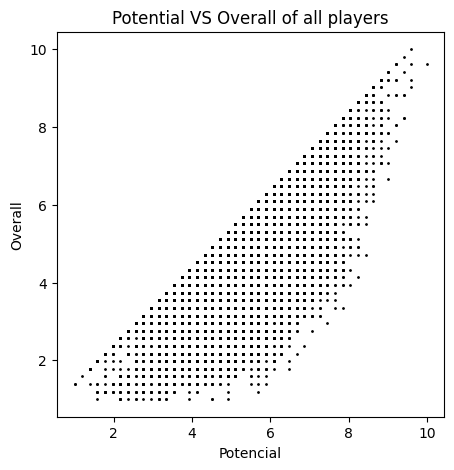

In [457]:
plt.figure(figsize=(5,5))
plt.scatter(data['potential'], data['overall'], s=1, c="black")
plt.title('Potential VS Overall of all players')
plt.xlabel('Potencial')
plt.ylabel('Overall')
plt.show()


In [458]:
def calculando_distancias(data, point):
    data = np.array(data)
    point = np.array(point)
    distancias =  np.sqrt(( (data - point) ** 2).sum(axis = 1) )
    return np.sort(distancias)
    #return distancias.idxmin(axis=1)

In [459]:
def distance(point1, point2):
    distance_euc = np.sqrt( ( (point2 - point1) ** 2).sum() )
    return distance_euc

In [460]:
data = np.array(data)
print(data[0], data[1])
distance(data[0], data[1])

[ 9.60869565 10.        ] [9.41304348 9.80434783]


0.27669395785560613

In [461]:
def find_neighbors(data, point_index, epsilon):
    neighbors = []
    for i in range(len(data)):
        if distance(data[point_index], data[i]) <= epsilon:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, visited, neighbors, cluster, epsilon, min_samples):
    for i in neighbors:
        if not visited[i]:
            visited[i] = True
            new_neighbors = find_neighbors(data, i, epsilon)
            if len(new_neighbors) >= min_samples:
                neighbors.extend(new_neighbors)
        if i not in cluster:
            cluster.append(i)


In [462]:
def dbscan(data, epsilon, min_samples):
    # Inicializa una lista vacía para almacenar los clústeres encontrados
    clusters = []

    # Marca todos los puntos como no visitados
    visited = [False] * len(data)

    # Comienza la exploración de los puntos de datos
    for i in range(len(data)):
        if not visited[i]:
            # Encuentra los vecinos del punto actual
            neighbors = find_neighbors(data, i, epsilon)
            
            if len(neighbors) < min_samples:
                # Si el punto actual no tiene suficientes vecinos, márcalo como ruido
                visited[i] = True
                
            else:
                # Crea un nuevo clúster y agrega el punto actual a él
                cluster = [i]
                visited[i] = True
                
                # Expande el clúster
                expand_cluster(data, visited, neighbors, cluster, epsilon, min_samples)
                
                # Agrega el clúster a la lista de clústeres
                clusters.append(cluster)

    return clusters

In [463]:
clusters = dbscan(data, 0.2, 50)

In [470]:
print(type(clusters))
print(len(clusters))
clusters[3]

<class 'list'>
4


[17445,
 16996,
 16997,
 16998,
 16999,
 17000,
 17001,
 17002,
 17003,
 17004,
 17006,
 17007,
 17008,
 17010,
 17012,
 17014,
 17017,
 17021,
 17023,
 17024,
 17025,
 17031,
 17034,
 17044,
 17069,
 17098,
 17118,
 17180,
 17268,
 17282,
 17292,
 17315,
 17350,
 17352,
 17406,
 17435,
 17436,
 17437,
 17438,
 17439,
 17440,
 17441,
 17443,
 17446,
 17447,
 17448,
 17449,
 17450,
 17452,
 17453,
 17468,
 17469,
 17470,
 17481,
 17489,
 17520,
 17527,
 17542,
 17555,
 17630,
 17644,
 17660,
 17661,
 17700,
 17720,
 17740,
 17987]

In [435]:
print(type(clusters))

<class 'list'>


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

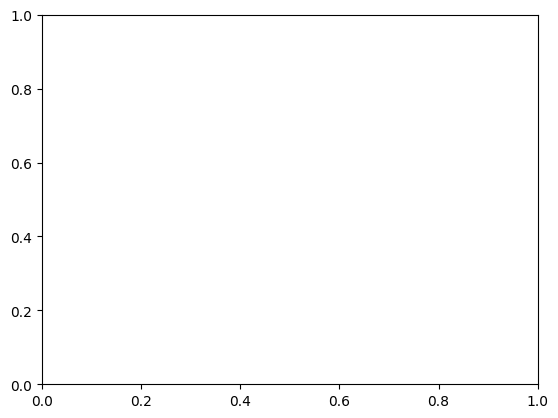

In [445]:
plt.scatter(range(0, len(clusters)), clusters)
plt.show

## DBSCAN using sklearn

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

## The Elbow method using KMeans Clustering

/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alechiquito/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

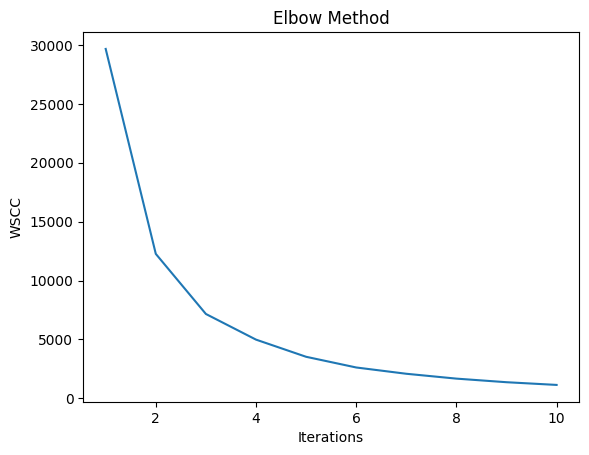

In [343]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters= i)
    model.fit(data)
    wcss.append(model.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel('Iterations')
plt.ylabel('WSCC')
plt.show()

In [344]:
model = DBSCAN(eps=0.2, min_samples=50).fit(data)

labels = model.labels_
print(type(labels))
np.unique(labels)

TypeError: DBSCAN() got an unexpected keyword argument 'eps'

In [ ]:
print('Elementos de ruido: ', np.count_nonzero(labels == -1))
print('Elementos en cluster 0: ', np.count_nonzero(labels == 0))
print('Elementos en cluster 1: ', np.count_nonzero(labels == 1))